# POL-2 Half Vectors Analysis

Working on producing various comparion plots of the half-vectors of the Jellyfish - going region by region. I need to also note/deal with the 0/180 degeneracy that occurs. Also need to ensure I rotate angles by 90degrees. 

see: http://www.astropy.org/astropy-tutorials/plot-catalog.html

and 

see: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.io import ascii
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxesSubplot
from astropy.coordinates import SkyCoord


from astropy.table import Table, Column
import astropy.units as u
import numpy as np
import aplpy

In [62]:
%matplotlib inline

In [98]:
# want to make calculating and adding l and b into a mathod:

def calculate_lb(self):   # calculate l and b is a method
    '''calculate the l and b from a generic POL-2 vector catalog containing RA and DEC'''
    ldeg = []
    bdeg = []
    for x in range(len(self['X'])):
        rarad = self['RA'][x]*u.radian
        decrad = self['DEC'][x]*u.radian
        c = SkyCoord(rarad, decrad).galactic
        l = c.l.deg
        b = c.b.deg
        ldeg.append(l)
        bdeg.append(b)
        
    ldeg = Column(ldeg, name='ldeg')
    bdeg = Column(bdeg, name='bdeg')

    try:
        if self['ldeg'].any:
            print ('column exists (ldeg)')
    except:
        print ('column does not exist')
        self.add_columns([ldeg])
        print ('added fileprovided[ldeg]')

    try:
        if self['bdeg'].any:
            print ('column exists (bdeg)')
    except:
        print ('column does not exist')
        self.add_columns([bdeg])
        print ('added fileprovided[bdeg]')   
#     return self

# want to make calculating the B angle into a mathod:

def calculate_bang(self): # calculates the B angle (POL-2 angle + 90)
    '''calculate the B angle from POL-2 vector catalog containing ANG (simply add 90)'''
    bang = []
    for x in range(len(self['X'])):
        ang = self['ANG'][x]
        newang = ang+90.0
        bang.append(newang)
    bang = Column(bang, name='bang')    
    try:
        if self['bang'].any:
            print ('column exists (bang)')
    except:
        print ('column does not exist')
        self.add_columns([bang])
        print ('added fileprovided[bang]')
#     return self

In [116]:

try:
    print ("running on mac")
    pol2path450 = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/450/'
    pol2path850 = '/Users/hparsons/Documents/EAO/Research/JellyFish/data/POL2/850/'
    
    BellTop3 = pol2path850 + 'ard_Bell-Top-selcat-3-3-3.FIT'
    BellTop5 = pol2path850 + 'ard_Bell-Top-selcat-5-5-5.FIT'

    Leg1a3 = pol2path850 + 'ard_Leg-1a-selcat-3-3-3.FIT'
    Leg1a5 = pol2path850 + 'ard_Leg-1a-selcat-5-5-5.FIT'
    Leg1b3 = pol2path850 + 'ard_Leg-1b-selcat-3-3-3.FIT'
    Leg1b5 = pol2path850 + 'ard_Leg-1b-selcat-5-5-5.FIT'
    Leg2a3 = pol2path850 + 'ard_Leg-2a-selcat-3-3-3.FIT'
    Leg2a5 = pol2path850 + 'ard_Leg-2a-selcat-5-5-5.FIT'
#     ard_Leg-2b-selcat-3-3-3.FIT
#     ard_Leg-2b-selcat-5-5-5.FIT
#     ard_Leg-3a-selcat-3-3-3.FIT
#     ard_Leg-3a-selcat-5-5-5.FIT
#     ard_Leg-4a-selcat-3-3-3.FIT
#     ard_Leg-4a-selcat-5-5-5.FIT
#     ard_Leg-5a-selcat-3-3-3.FIT
#     ard_Leg-5a-selcat-5-5-5.FIT

    BrightBlue3 = pol2path850 + 'ard_Outflow-Birght-Blue-selcat-3-3-3.FIT'
    BrightBlue5 = pol2path850 + 'ard_Outflow-Birght-Blue-selcat-5-5-5.FIT'
    BrightRed3 = pol2path850 + 'ard_Outflow-Birght-Red-selcat-3-3-3.FIT'
    BrightRed5 = pol2path850 + 'ard_Outflow-Birght-Red-selcat-5-5-5.FIT'
    Faint3 = pol2path850 + 'ard_Outflow-Faint-selcat-3-3-3.FIT'
    Faint5 = pol2path850 + 'ard_Outflow-Faint-selcat-5-5-5.FIT'
    All3 = pol2path850 + 'selcat-3-3-3.FIT'
    All5 =pol2path850 + 'selcat-5-5-5.FIT'


except:
    print ("running on kukui")

running on mac


In [117]:
#fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

# pick 3 sigma or 5 sigma

vectors_All = Table.read(All3)

vectors_BellTop = Table.read(BellTop3)
vectors_BrightBlue = Table.read(BrightBlue3)
vectors_BrightRed = Table.read(BrightRed3)
vectors_Faint =  Table.read(Faint3)

vectors_Leg1a = Table.read(Leg1a3)
vectors_Leg2a = Table.read(Leg2a3)


In [118]:
calculate_lb(vectors_All)

calculate_lb(vectors_BellTop)
calculate_lb(vectors_BrightBlue)
calculate_lb(vectors_BrightRed)
calculate_lb(vectors_Faint)

calculate_lb(vectors_Leg1a)
calculate_lb(vectors_Leg2a)

calculate_bang(vectors_All)

calculate_bang(vectors_BellTop)
calculate_bang(vectors_BrightBlue)
calculate_bang(vectors_BrightRed)
calculate_bang(vectors_Faint)

calculate_bang(vectors_Leg1a)
calculate_bang(vectors_Leg2a)

column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[ldeg]
column does not exist
added fileprovided[bdeg]
column does not exist
added fileprovided[bang]
column does not exist
added fileprovided[bang]
column does not exist
added fileprovided[bang]
column does not exist
added fileprovided[bang]
column does not exist
added fileprovided[bang]
column does not exist
added fileprovided[bang]
column does not exist
added fileprovided[bang]


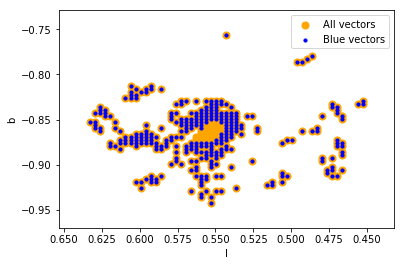

In [134]:
plt.figure()

x = vectors_All['ldeg']
y = vectors_All['bdeg']

x1 = vectors_BellTop['ldeg']
y1 = vectors_BellTop['bdeg']

x2 = vectors_BrightBlue['ldeg']
y2 = vectors_BrightBlue['bdeg']

x3 = vectors_BrightRed['ldeg']
y3 = vectors_BrightRed['bdeg']

x4 = vectors_Faint['ldeg']
y4 = vectors_Faint['bdeg']


x5 = vectors_Leg1a['ldeg']
y5 = vectors_Leg2a['bdeg']

x6 = vectors_Leg2a['ldeg']
y6 = vectors_Leg2a['bdeg']

x7 = vectors_BrightBlue['ldeg']
y7 = vectors_BrightBlue['bdeg']


plt.scatter(x, y, marker='o', color='orange', s=50, label='All vectors')
plt.scatter(x2, y2, marker='o', color='blue', s=10, label='Blue vectors')
plt.xlabel('l')
plt.ylabel('b')

plt.legend()

plt.gca().invert_xaxis()


#vectors_BellTop

#### LEG1A does not look correct!!!

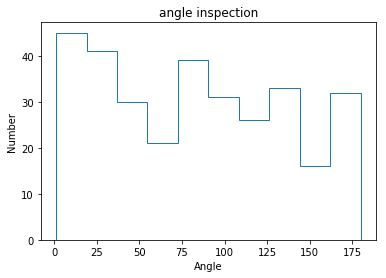

In [93]:
# Now we will create a histogram of our B angles
plt.figure()
plt.hist(vectors_Leg1a3['bang'], label='default', histtype='step')

# plt.hist(vectors_BrightBlue5['bang'], label='default', histtype='step')
# plt.hist(vectors_BrightRed5['bang'], label='default', histtype='step', alpha=0.5)
plt.xlabel('Angle')
plt.ylabel('Number')
plt.title('angle inspection')



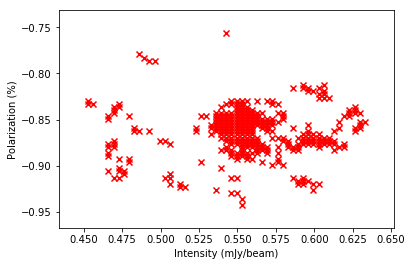